<a href="https://colab.research.google.com/github/LinggarM/Movie-Genre-Classification-based-on-synopsis-using-Deep-Neural-Network-and-TF-IDF-Vectorizer/blob/main/Movie_Genre_Classification_based_on_synopsis_using_Deep_Neural_Network_and_TF_IDF_Vectorizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retrieve Data

In [7]:
import json
import requests

In [8]:
titles = []
synopsis = []
genres = []

for i in range(1000) :
  url = ("https://api.themoviedb.org/3/movie/%d?api_key=63fea4c709da1f1496b7a1ca7a3c6083" % i)
  r = requests.get(url)
  json_data = json.loads(r.text)
  try:
    if ((json_data['overview'] != "") and (json_data['overview'] != "No overview found.") and (json_data['original_language'] == 'en') and (json_data['genres'][0].get('name') != "")) :
      titles.append(json_data['title'])
      synopsis.append(json_data['overview'])
      genres.append(json_data['genres'][0].get('name'))
  except Exception:
    pass

In [9]:
import pandas as pd

df_movies = pd.DataFrame({'title': titles, 'synopsis': synopsis, 'genre': genres})
df_movies.head()

,title,synopsis,genre
0,Four Rooms,It's Ted the Bellhop's first night on the job....,Crime
1,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",Action
2,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...,Documentary
3,Star Wars,Princess Leia is captured and held hostage by ...,Adventure
4,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",Animation


In [10]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     621 non-null    object
 1   synopsis  621 non-null    object
 2   genre     621 non-null    object
dtypes: object(3)
memory usage: 14.7+ KB


In [11]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
labels = encoder.fit_transform(df_movies['genre'].values)
labels

array([ 4,  0,  5,  1,  2,  3,  6, 12,  6, 10,  1,  6,  5,  1,  0,  6,  6,
        6, 17,  2, 14,  1,  6, 14, 14, 11,  4, 15,  3,  6,  6,  6,  6,  1,
        3,  6, 12, 14,  6,  0,  6,  1,  1,  6,  1,  0,  5,  4,  3,  0,  0,
       14,  0,  3,  4,  4,  1, 14,  4,  0, 13,  3,  6,  4,  1,  1,  1,  1,
        1,  5,  5,  1,  5,  6, 13, 10,  8,  6,  6, 13, 15, 14, 13,  0,  6,
       14, 15,  8, 15,  3,  1, 14, 14, 14, 10, 14,  1, 14, 10,  3, 15,  4,
        0,  6,  1,  4, 14,  6, 15,  4,  6, 14,  3,  1,  0,  3, 14, 14, 14,
        6,  6,  6,  6,  3, 12, 10, 10,  1,  0,  6,  6,  6,  4,  4,  6,  6,
        0,  6,  4,  3,  6,  6,  3,  6,  4,  4,  3,  1,  6,  4,  3,  3,  8,
        7,  1,  1,  4, 12,  6,  6,  8,  0,  4,  4,  8,  6, 11,  0,  4,  3,
        1,  3, 17,  6,  3,  5,  3,  6,  6,  0,  8,  4,  3, 17,  4, 15,  0,
        3,  8,  6, 13,  0,  0,  6,  0,  4,  3, 15,  0,  4,  1,  1,  1,  0,
        3,  6,  3,  3,  4,  3,  6, 10,  3,  0, 10,  3,  6,  6,  4,  6,  4,
        6,  6,  3,  0,  1

In [12]:
encoder.classes_

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Mystery', 'Romance', 'Science Fiction', 'Thriller',
       'War', 'Western'], dtype=object)

In [13]:
df_movies['label'] = labels
df_movies

,title,synopsis,genre,label
0,Four Rooms,It's Ted the Bellhop's first night on the job....,Crime,4
1,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",Action,0
2,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...,Documentary,5
3,Star Wars,Princess Leia is captured and held hostage by ...,Adventure,1
4,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",Animation,2
...,...,...,...,...
616,Sherlock Jr.,"A film projectionist longs to be a detective, ...",Action,0
617,Sleuth,A mystery novelist devises an insurance scam w...,Mystery,12
618,Straw Dogs,"David Sumner, a mild-mannered academic from th...",Crime,4
619,Stagecoach,A group of people traveling on a stagecoach fi...,Western,17


In [14]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


# Data Preprocessing

In [15]:
df_movies.to_csv("/gdrive/MyDrive/Upload/Machine Learning/Projects/Movie Genre Classification based on synopsis using Deep Neural Network and TF-IDF Vectorizer/df_movies.csv", index = False)

In [16]:
df_movies = pd.read_csv("/gdrive/MyDrive/Upload/Machine Learning/Projects/Movie Genre Classification based on synopsis using Deep Neural Network and TF-IDF Vectorizer/df_movies.csv")
df_movies

,title,synopsis,genre,label
0,Four Rooms,It's Ted the Bellhop's first night on the job....,Crime,4
1,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",Action,0
2,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...,Documentary,5
3,Star Wars,Princess Leia is captured and held hostage by ...,Adventure,1
4,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",Animation,2
...,...,...,...,...
616,Sherlock Jr.,"A film projectionist longs to be a detective, ...",Action,0
617,Sleuth,A mystery novelist devises an insurance scam w...,Mystery,12
618,Straw Dogs,"David Sumner, a mild-mannered academic from th...",Crime,4
619,Stagecoach,A group of people traveling on a stagecoach fi...,Western,17


In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_movies['synopsis'].values, df_movies['label'].values, test_size = 0.2, random_state = 0)

# Feature Engineering

In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', lowercase = True)
features = vectorizer.fit_transform(x_train) # training vector TF-IDF pada tiap data
features_test = vectorizer.transform(x_test)

In [154]:
features[0]

<1x5661 sparse matrix of type '<class 'numpy.float64'>'
	with 40 stored elements in Compressed Sparse Row format>

In [155]:
print(type(features),features.shape)

<class 'scipy.sparse.csr.csr_matrix'> (496, 5661)


In [85]:
print(y_train[:10])

[ 1  5  6  4  0  1  6  6 14 10]


# Model Training

## SVM

In [146]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_model = SVC()
svm_model.fit(features, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [148]:
y_pred = svm_model.predict(features_test)
accuracy_score(y_test, y_pred)

0.248

## Multinomial Naive Bayes

In [150]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

mnb_model = MultinomialNB()
mnb_model.fit(features, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [151]:
y_pred = mnb_model.predict(features_test)
accuracy_score(y_test, y_pred)

0.272

Text(66.48, 0.5, 'Actual Class')

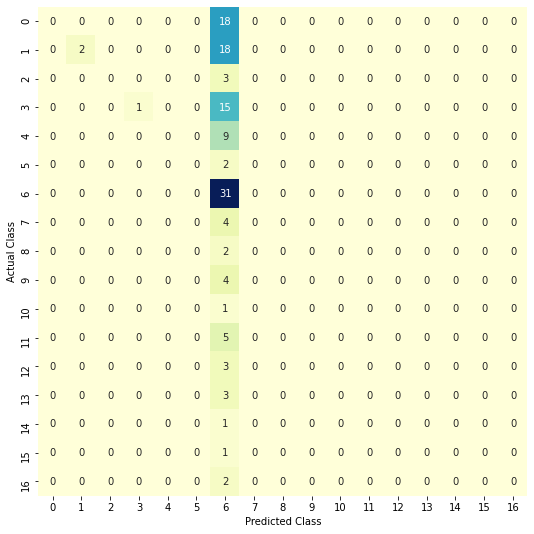

In [153]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

ax = plt.subplots(figsize=(9, 9))
ax = sns.heatmap(conf_mat, square = True, annot=True, fmt = 'd', cmap="YlGnBu", cbar = False)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")

## Neural Network

In [132]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Softmax, Dropout

model = Sequential()
model.add(Dense(256, input_shape = features[0].shape, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(19))
model.add(Softmax())

In [133]:
model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [134]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 256)               1449472   
_________________________________________________________________
dense_19 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_20 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_21 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_22 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 19)               

In [135]:
history = model.fit(features, y_train, validation_data = (features_test, y_test), epochs = 50)

Epoch 1/50
16/16 [==============================] - 2s 42ms/step - loss: 3.0434 - accuracy: 0.1220 - val_loss: 2.4573 - val_accuracy: 0.2480
Epoch 2/50
16/16 [==============================] - 0s 15ms/step - loss: 2.5416 - accuracy: 0.2136 - val_loss: 2.3708 - val_accuracy: 0.2480
Epoch 3/50
16/16 [==============================] - 0s 16ms/step - loss: 2.3348 - accuracy: 0.2516 - val_loss: 2.3862 - val_accuracy: 0.2480
Epoch 4/50
16/16 [==============================] - 0s 15ms/step - loss: 2.3935 - accuracy: 0.2360 - val_loss: 2.3678 - val_accuracy: 0.2480
Epoch 5/50
16/16 [==============================] - 0s 15ms/step - loss: 2.1954 - accuracy: 0.2678 - val_loss: 2.3031 - val_accuracy: 0.3040
Epoch 6/50
16/16 [==============================] - 0s 15ms/step - loss: 1.8354 - accuracy: 0.4418 - val_loss: 2.3756 - val_accuracy: 0.2640
Epoch 7/50
16/16 [==============================] - 0s 15ms/step - loss: 1.6319 - accuracy: 0.5283 - val_loss: 2.5010 - val_accuracy: 0.2400
Epoch 8/50
16

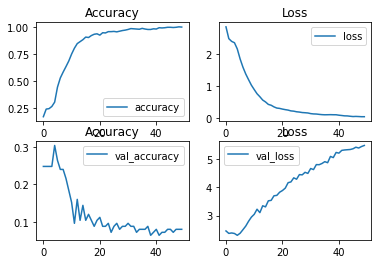

In [136]:
import matplotlib.pyplot as plt

plt.subplot(221)
plt.title("Accuracy")
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.subplot(222)
plt.title("Loss")
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.subplot(223)
plt.title("Accuracy")
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.subplot(224)
plt.title("Loss")
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()